# Italy Map Plot

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.image as mpimg
import matplotlib.colors as colors
import geopandas as gpd
from matplotlib.font_manager import FontProperties
import numpy as np

In [17]:
df = pd.read_csv('../data/cleaned/merged_accoglienza.csv')
df.head()

,Regione,total_immigrants
0,Abruzzo,234241.0
1,Basilicata,177990.0
2,Calabria,465178.0
3,Campania,698959.0
4,Emilia-Romagna,980528.0


In [18]:
#Download a geojson of the region geometries
#gdf = gpd.read_file(filename=r'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson')
#gdf = gdf.dissolve(by='reg_name') #The geojson is to detailed, dissolve boundaries by reg_name attribute
#gdf = gdf.reset_index()

In [19]:
gdf = gpd.read_file('../data/processed_limits_IT_municipalities.geojson')
gdf = pd.merge(left=gdf, right=df, how='left', left_on='reg_name', right_on='Regione')

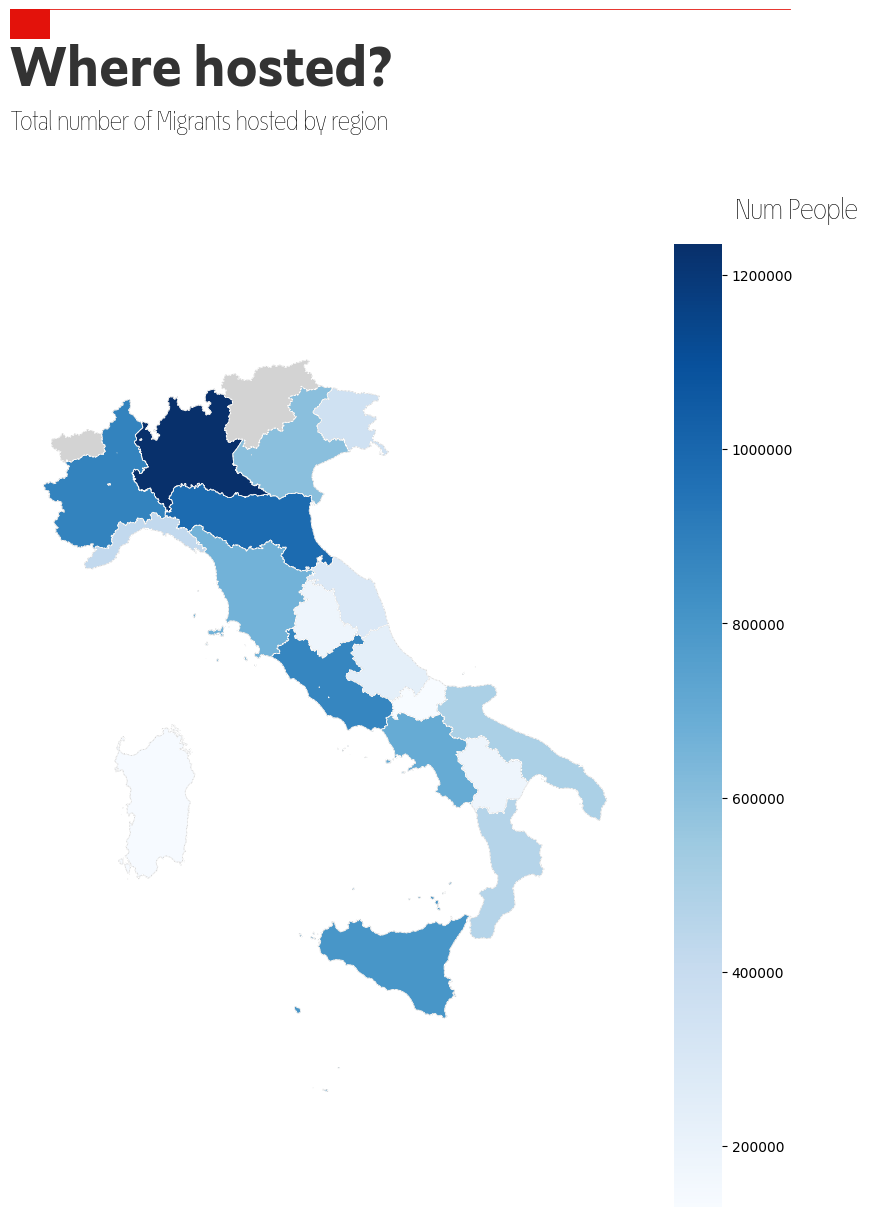

In [20]:
font_path = '../data/econosans/ecosans-bol.woff2.ttf'  # Update this path
custom_font = FontProperties(fname=font_path, size=35)
font_path2 = '../data/econosans/EconoSansReduced-35Thin.ttf' 
custom_font2 = FontProperties(fname=font_path2, size=100)

fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi =100)
column = 'total_immigrants'
vmin, vmax = gdf[column].min(), gdf[column].max()

# Create the choropleth map
mapping = gdf.plot(
    column=column,
    cmap="Blues",
    linewidth=0.5,
    ax=ax,
    edgecolor='0.8',
    vmin=vmin,
    vmax=vmax,
    missing_kwds={'color': 'lightgrey'}
)
gdf.boundary.plot(linestyle='--', linewidth=0.5, color='white', ax=ax)
ax.set_axis_off()

# ax.plot([0.12, 0.9], [0.98, 0.98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=0.6)
# ax.add_patch(plt.Rectangle((0.12, 0.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth=0))



fig.text(
    0.12, 0.93, "Where hosted?", 
    fontsize=40, fontweight="bold", fontproperties=custom_font,
    transform=fig.transFigure, 
    ha='left',  alpha=.8)
fig.text(
    0.123, 0.9, """Total number of Migrants hosted by region """, 
    fontsize=18, fontproperties=custom_font2
)





# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

# Add colorbar
# Adjust the shrink parameter as necessary to match the map's height
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.85,  format='%d')
cbar.outline.set_edgecolor('none')
cbar.set_label('Num People', fontproperties=custom_font2, fontsize=20,   rotation = 0, y = 1.05, x = -0.8) # Adding title to the colorbar



plt.savefig('../outputs/italian_map.png', bbox_inches='tight', dpi=300, facecolor="white")

plt.show()

